# Iris Plant Clustering using Principal Component Analysis (PCA)

**Project Overview:**  
This project demonstrates clustering analysis on the Iris dataset using Principal Component Analysis (PCA) for dimensionality reduction and K-Means clustering to identify distinct groups of iris plants.

**Dataset:** Iris dataset from Scikit-learn library  
**Techniques:** PCA, K-Means Clustering, Data Visualization  
**Author:** Academic Study Project

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Dataset
from sklearn.datasets import load_iris

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine Learning - Dimensionality Reduction
from sklearn.decomposition import PCA

# Machine Learning - Clustering
from sklearn.cluster import KMeans

# Machine Learning - Evaluation Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Settings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Matplotlib settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load the Iris Dataset

In [2]:
# Load Iris dataset from sklearn
iris = load_iris()

# Create a DataFrame for better data manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target Classes: {list(iris.target_names)}")

Dataset loaded successfully!

Dataset Shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


## 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*80)
print("Dataset Information:")
print("="*80)
print(df.info())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)

In [4]:
# Statistical summary
print("Statistical Summary of Features:")
print(df.describe())

# Check for missing values
print("\n" + "="*80)
print("Missing Values:")
print("="*80)
print(df.isnull().sum())

# Class distribution
print("\n" + "="*80)
print("Class Distribution:")
print("="*80)
print(df['species_name'].value_counts())

Statistical Summary of Features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Missing Values:
sepal length (cm)    0

### 3.2 Feature Distributions

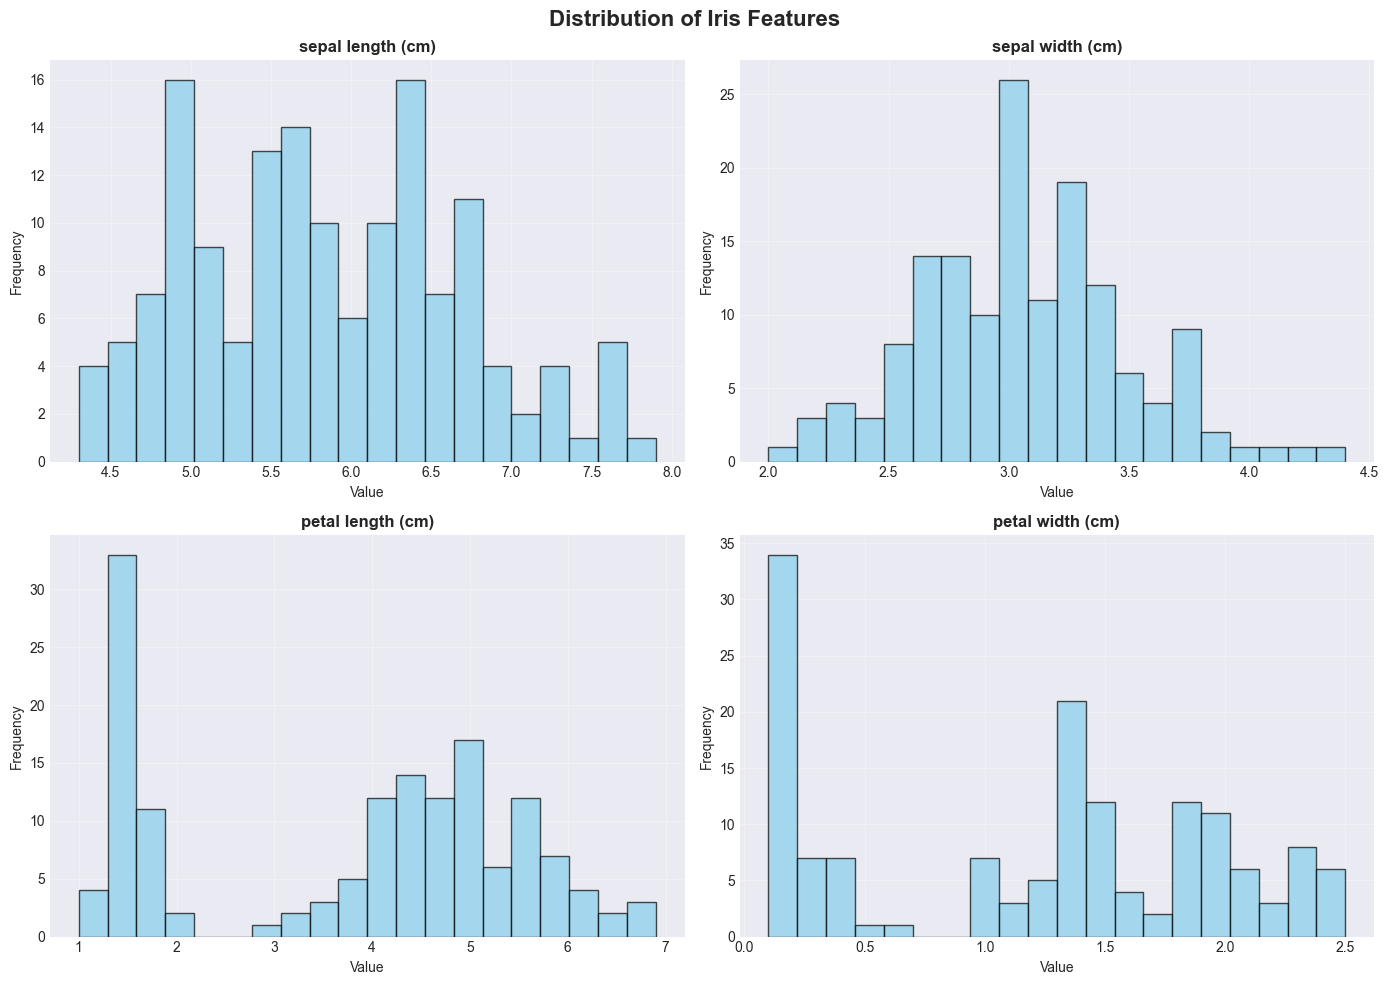

In [5]:
# Visualize feature distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Iris Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(iris.feature_names):
    row = idx // 2
    col_idx = idx % 2
    
    axes[row, col_idx].hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'{col}', fontweight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Correlation Analysis

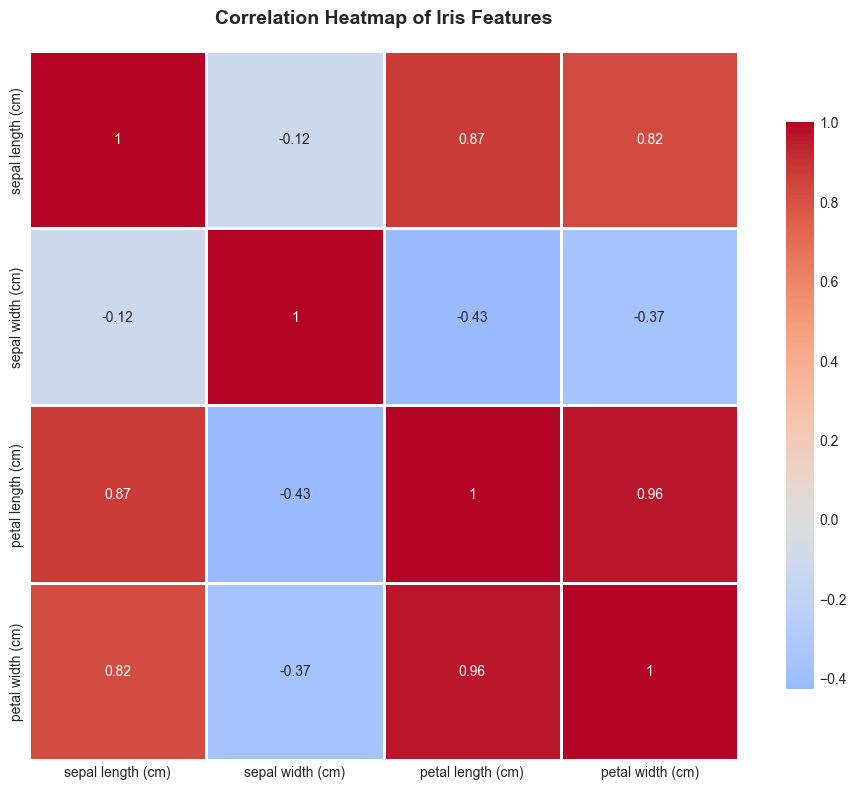

Key Observations:
- Petal length and petal width are highly correlated (0.96)
- Petal features are strongly correlated with sepal length
- Sepal width has weaker correlation with other features


In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Iris Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Key Observations:")
print("- Petal length and petal width are highly correlated (0.96)")
print("- Petal features are strongly correlated with sepal length")
print("- Sepal width has weaker correlation with other features")

### 3.4 Pairplot - Feature Relationships

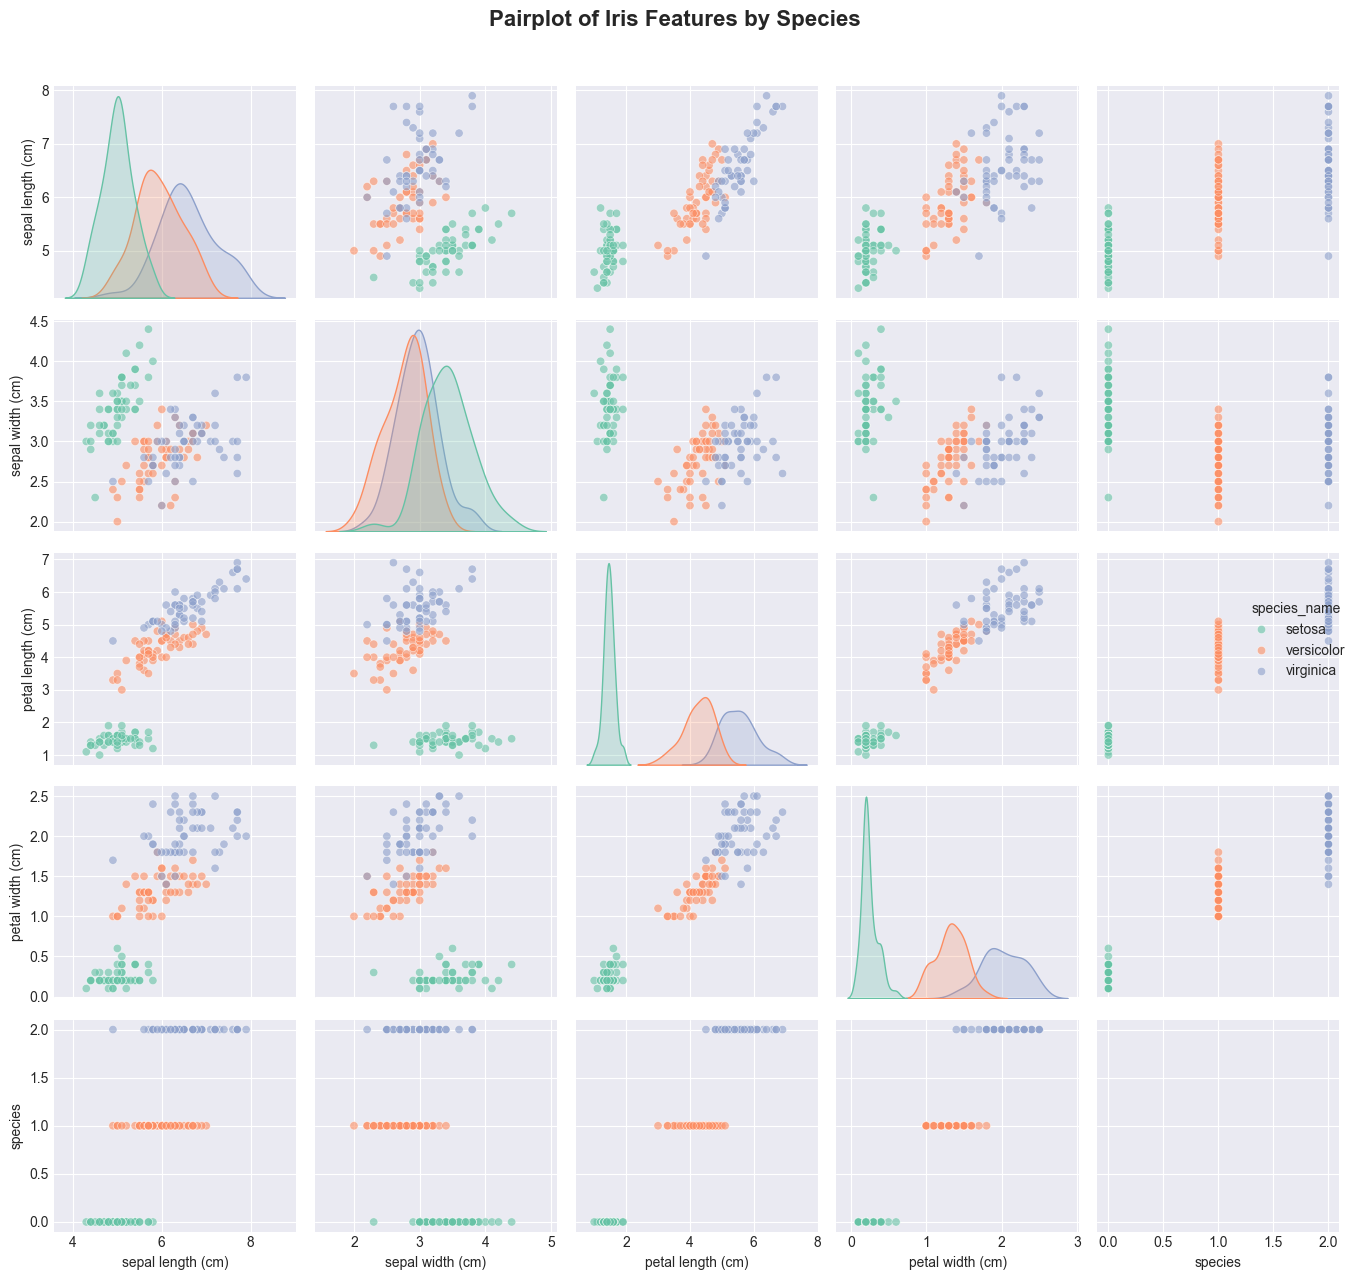

Observation: The pairplot shows clear separation between species, especially for petal features.


In [7]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species_name', palette='Set2', height=2.5, 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Iris Features by Species', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Observation: The pairplot shows clear separation between species, especially for petal features.")

## 4. Data Preprocessing

### 4.1 Feature Extraction

In [8]:
# Separate features and target
X = df[iris.feature_names].values
y = df['species'].values
y_names = df['species_name'].values

print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")
print(f"\nFeatures (X): 4 features - {list(iris.feature_names)}")
print(f"Target (y): Species labels - {list(iris.target_names)}")

Feature Matrix Shape: (150, 4)
Target Vector Shape: (150,)

Features (X): 4 features - ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target (y): Species labels - [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


### 4.2 Feature Standardization

**Why Standardization is Critical for PCA:**
- PCA is sensitive to the scale of features
- Features with larger scales can dominate the principal components
- Standardization ensures all features contribute equally to the analysis
- Converts all features to have mean=0 and standard deviation=1

In [9]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print("Feature Standardization Completed!")
print(f"\nOriginal Data - Mean: {X.mean(axis=0).round(2)}")
print(f"Original Data - Std: {X.std(axis=0).round(2)}")
print(f"\nScaled Data - Mean: {X_scaled.mean(axis=0).round(2)}")
print(f"Scaled Data - Std: {X_scaled.std(axis=0).round(2)}")
print("\n✓ All features now have mean≈0 and std≈1")

Feature Standardization Completed!

Original Data - Mean: [5.84 3.06 3.76 1.2 ]
Original Data - Std: [0.83 0.43 1.76 0.76]

Scaled Data - Mean: [-0. -0. -0. -0.]
Scaled Data - Std: [1. 1. 1. 1.]

✓ All features now have mean≈0 and std≈1


## 5. Principal Component Analysis (PCA)

### 5.1 Apply PCA for Dimensionality Reduction

In [10]:
# Apply PCA to reduce from 4 dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA Transformation Completed!")
print(f"Original Dimensions: {X_scaled.shape[1]}")
print(f"Reduced Dimensions: {X_pca.shape[1]}")
print(f"\nExplained Variance Ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"\nTotal Variance Explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print("\n✓ The first 2 principal components capture most of the variance in the data!")

PCA Transformation Completed!
Original Dimensions: 4
Reduced Dimensions: 2

Explained Variance Ratio:
  PC1: 0.7296 (72.96%)
  PC2: 0.2285 (22.85%)

Total Variance Explained: 95.81%

✓ The first 2 principal components capture most of the variance in the data!


### 5.2 Visualize Explained Variance

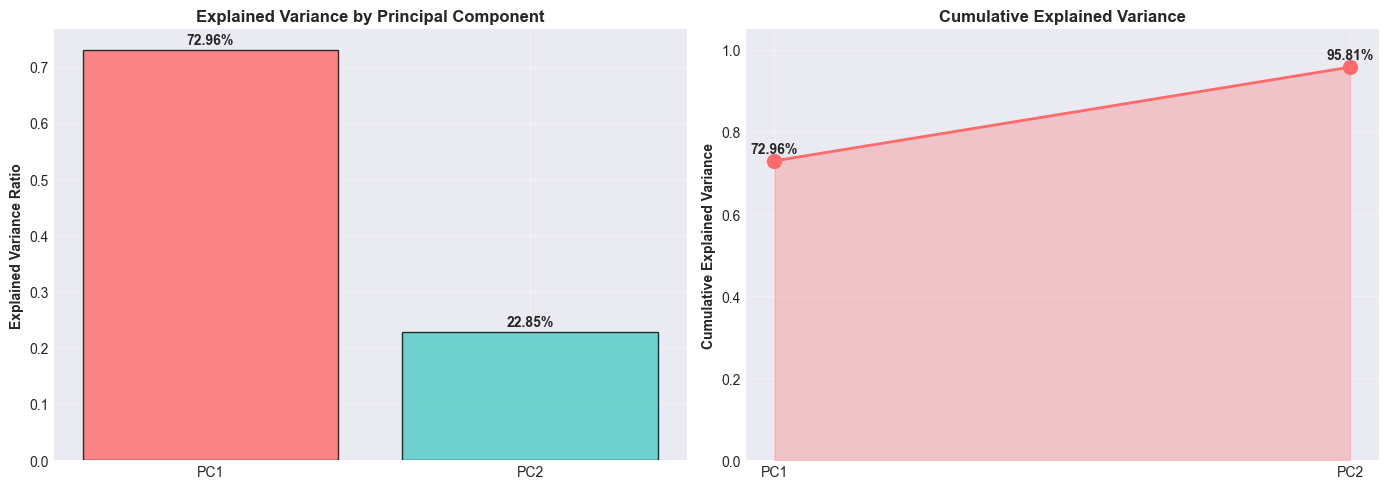

In [11]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual explained variance
axes[0].bar(['PC1', 'PC2'], pca.explained_variance_ratio_, color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Explained Variance Ratio', fontweight='bold')
axes[0].set_title('Explained Variance by Principal Component', fontweight='bold')
axes[0].grid(True, alpha=0.3)
for i, v in enumerate(pca.explained_variance_ratio_):
    axes[0].text(i, v + 0.01, f'{v*100:.2f}%', ha='center', fontweight='bold')

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
axes[1].plot(['PC1', 'PC2'], cumulative_variance, marker='o', color='#FF6B6B', linewidth=2, markersize=10)
axes[1].fill_between(range(2), cumulative_variance, alpha=0.3, color='#FF6B6B')
axes[1].set_ylabel('Cumulative Explained Variance', fontweight='bold')
axes[1].set_title('Cumulative Explained Variance', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1.05])
for i, v in enumerate(cumulative_variance):
    axes[1].text(i, v + 0.02, f'{v*100:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 5.3 PCA Loadings (Feature Contributions)

In [12]:
# Create a DataFrame for PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=iris.feature_names
)

print("PCA Loadings (Feature Contributions to Principal Components):")
print("="*70)
print(loadings)
print("\nInterpretation:")
print("- Positive values: feature increases with the PC")
print("- Negative values: feature decreases with the PC")
print("- Larger absolute values: stronger contribution to that PC")

PCA Loadings (Feature Contributions to Principal Components):
                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942

Interpretation:
- Positive values: feature increases with the PC
- Negative values: feature decreases with the PC
- Larger absolute values: stronger contribution to that PC


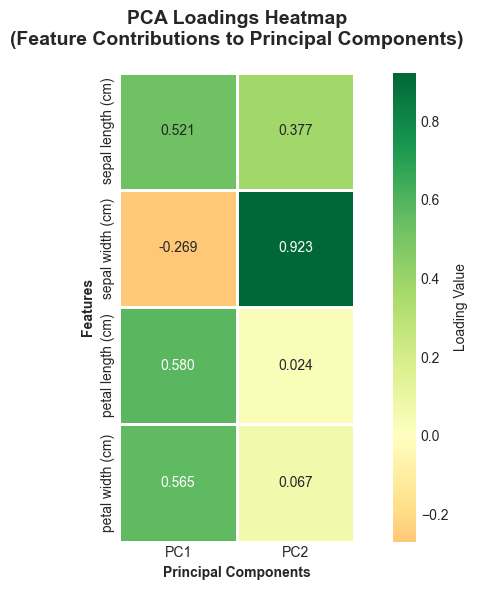

In [13]:
# Visualize PCA loadings as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Loading Value'},
            linewidths=1, square=True, fmt='.3f')
plt.title('PCA Loadings Heatmap\n(Feature Contributions to Principal Components)', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Features', fontweight='bold')
plt.xlabel('Principal Components', fontweight='bold')
plt.tight_layout()
plt.show()

### 5.4 Create PCA DataFrame

In [14]:
# Create DataFrame with PCA results
pca_df = pd.DataFrame(
    data=X_pca,
    columns=['PC1', 'PC2']
)
pca_df['species'] = y
pca_df['species_name'] = y_names

print("PCA DataFrame created successfully!")
print(f"Shape: {pca_df.shape}")
print("\nFirst 5 rows:")
print(pca_df.head())

PCA DataFrame created successfully!
Shape: (150, 4)

First 5 rows:
        PC1       PC2  species species_name
0 -2.264703  0.480027        0       setosa
1 -2.080961 -0.674134        0       setosa
2 -2.364229 -0.341908        0       setosa
3 -2.299384 -0.597395        0       setosa
4 -2.389842  0.646835        0       setosa


## 6. K-Means Clustering

### 6.1 Determine Optimal Number of Clusters (Elbow Method)

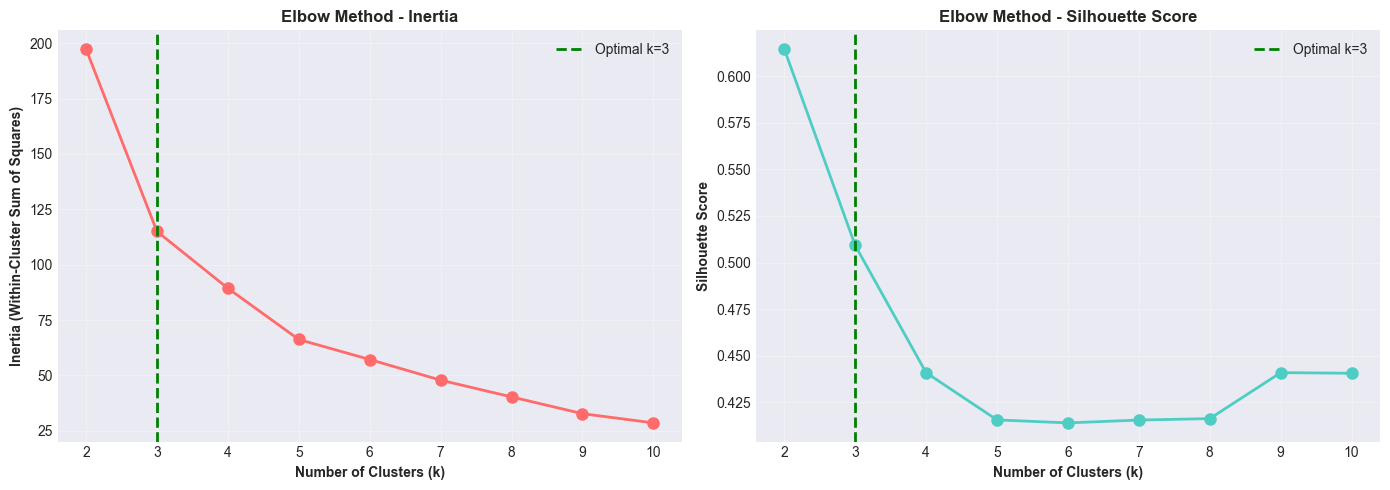

Optimal number of clusters: k=3 (matches the 3 iris species)


In [15]:
# Elbow Method to find optimal k
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Visualize Elbow Method
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Inertia plot
axes[0].plot(K_range, inertias, marker='o', color='#FF6B6B', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontweight='bold')
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontweight='bold')
axes[0].set_title('Elbow Method - Inertia', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=3, color='green', linestyle='--', linewidth=2, label='Optimal k=3')
axes[0].legend()

# Silhouette score plot
axes[1].plot(K_range, silhouette_scores, marker='o', color='#4ECDC4', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontweight='bold')
axes[1].set_title('Elbow Method - Silhouette Score', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=3, color='green', linestyle='--', linewidth=2, label='Optimal k=3')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Optimal number of clusters: k=3 (matches the 3 iris species)")

### 6.2 Apply K-Means Clustering with k=3

In [16]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to DataFrame
pca_df['cluster'] = clusters

# Get cluster centers
centers = kmeans.cluster_centers_

print("K-Means Clustering Completed!")
print(f"Number of Clusters: {kmeans.n_clusters}")
print(f"\nCluster Centers (in PCA space):")
print(pd.DataFrame(centers, columns=['PC1', 'PC2'], index=['Cluster 0', 'Cluster 1', 'Cluster 2']))
print(f"\nCluster Distribution:")
print(pca_df['cluster'].value_counts().sort_index())

K-Means Clustering Completed!
Number of Clusters: 3

Cluster Centers (in PCA space):
                PC1       PC2
Cluster 0  0.572621 -0.807209
Cluster 1 -2.224753  0.288927
Cluster 2  1.721037  0.602887

Cluster Distribution:
cluster
0    53
1    50
2    47
Name: count, dtype: int64


## 7. Visualization of Clustering Results

### 7.1 Clusters in PCA Space

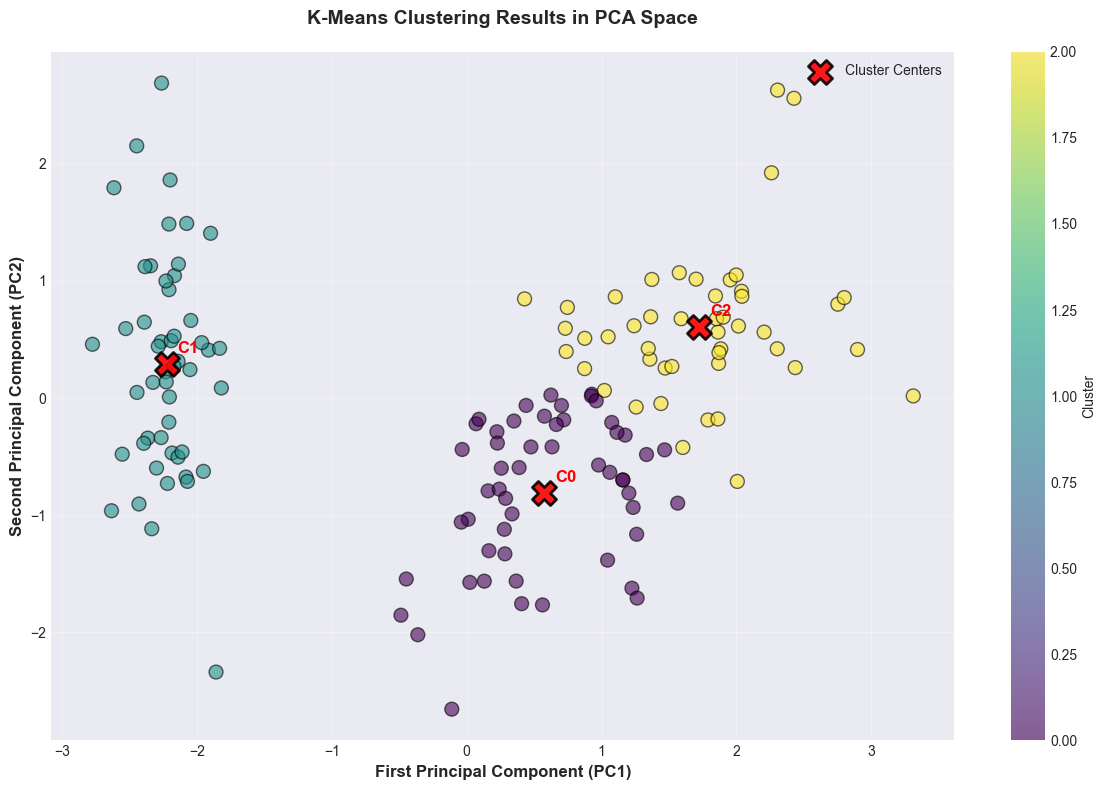

In [17]:
# Visualize K-Means clusters in PCA space
plt.figure(figsize=(12, 8))

# Plot clusters
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], 
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black', linewidth=1)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.9, 
           marker='X', edgecolors='black', linewidth=2, label='Cluster Centers')

# Add labels for cluster centers
for i, center in enumerate(centers):
    plt.annotate(f'C{i}', xy=center, xytext=(8, 8), textcoords='offset points',
                fontsize=12, fontweight='bold', color='red')

plt.xlabel('First Principal Component (PC1)', fontsize=12, fontweight='bold')
plt.ylabel('Second Principal Component (PC2)', fontsize=12, fontweight='bold')
plt.title('K-Means Clustering Results in PCA Space', fontsize=14, fontweight='bold', pad=20)
plt.colorbar(scatter, label='Cluster')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 7.2 Comparison: Predicted Clusters vs Actual Species

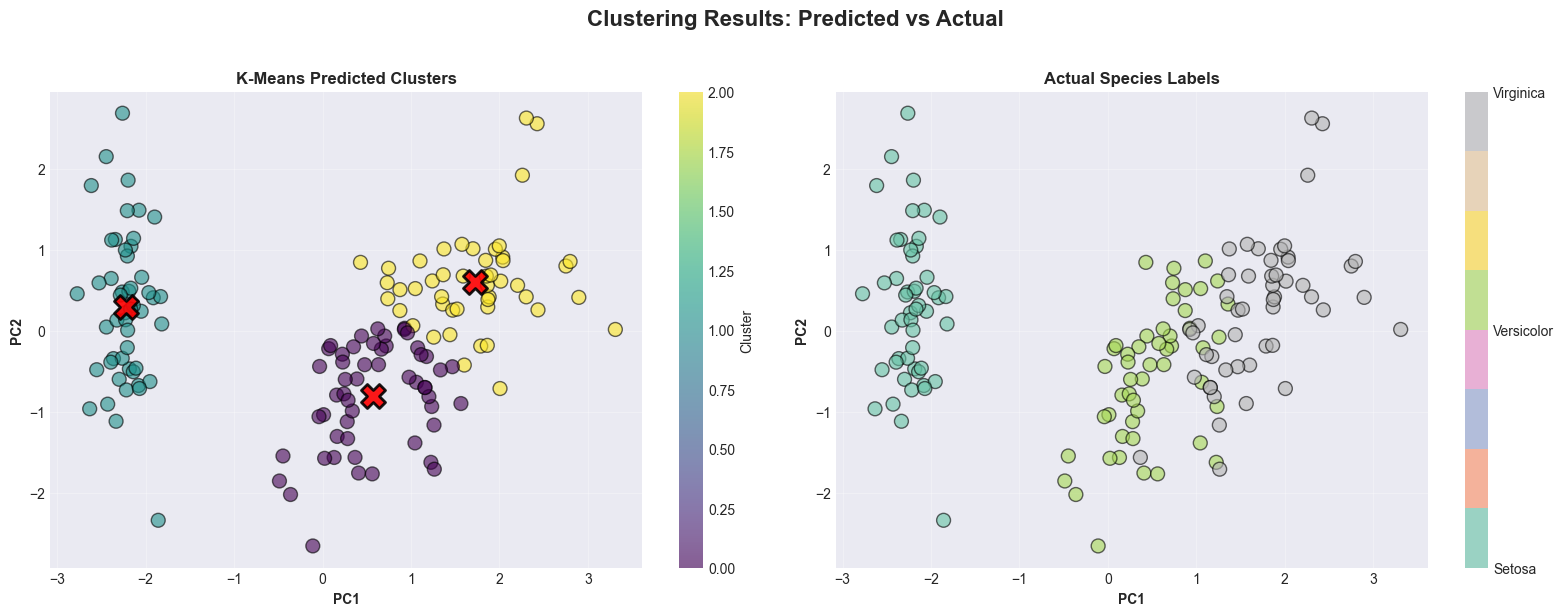

Observation: The K-Means clusters closely match the actual species labels!


In [18]:
# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: K-Means Clusters
scatter1 = axes[0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], 
                          cmap='viridis', s=100, alpha=0.6, edgecolors='black', linewidth=1)
axes[0].scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.9, 
               marker='X', edgecolors='black', linewidth=2)
axes[0].set_xlabel('PC1', fontweight='bold')
axes[0].set_ylabel('PC2', fontweight='bold')
axes[0].set_title('K-Means Predicted Clusters', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: Actual Species
scatter2 = axes[1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['species'], 
                          cmap='Set2', s=100, alpha=0.6, edgecolors='black', linewidth=1)
axes[1].set_xlabel('PC1', fontweight='bold')
axes[1].set_ylabel('PC2', fontweight='bold')
axes[1].set_title('Actual Species Labels', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter2, ax=axes[1], ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])

plt.suptitle('Clustering Results: Predicted vs Actual', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Observation: The K-Means clusters closely match the actual species labels!")

## 8. Clustering Evaluation Metrics

### 8.1 Clustering Quality Metrics

In [19]:
# Calculate clustering quality metrics
silhouette = silhouette_score(X_pca, clusters)
davies_bouldin = davies_bouldin_score(X_pca, clusters)
calinski_harabasz = calinski_harabasz_score(X_pca, clusters)

print("="*70)
print("CLUSTERING QUALITY METRICS")
print("="*70)
print(f"\n1. Silhouette Score: {silhouette:.4f}")
print("   - Range: [-1, 1]")
print("   - Higher is better (>0.5 is good)")
print("   - Measures how similar objects are within clusters vs other clusters")

print(f"\n2. Davies-Bouldin Index: {davies_bouldin:.4f}")
print("   - Range: [0, ∞)")
print("   - Lower is better")
print("   - Measures average similarity between clusters")

print(f"\n3. Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print("   - Range: [0, ∞)")
print("   - Higher is better")
print("   - Ratio of between-cluster to within-cluster dispersion")
print("\n" + "="*70)

CLUSTERING QUALITY METRICS

1. Silhouette Score: 0.5092
   - Range: [-1, 1]
   - Higher is better (>0.5 is good)
   - Measures how similar objects are within clusters vs other clusters

2. Davies-Bouldin Index: 0.7099
   - Range: [0, ∞)
   - Lower is better
   - Measures average similarity between clusters

3. Calinski-Harabasz Score: 293.8565
   - Range: [0, ∞)
   - Higher is better
   - Ratio of between-cluster to within-cluster dispersion



### 8.2 Confusion Matrix (Clusters vs Actual Species)

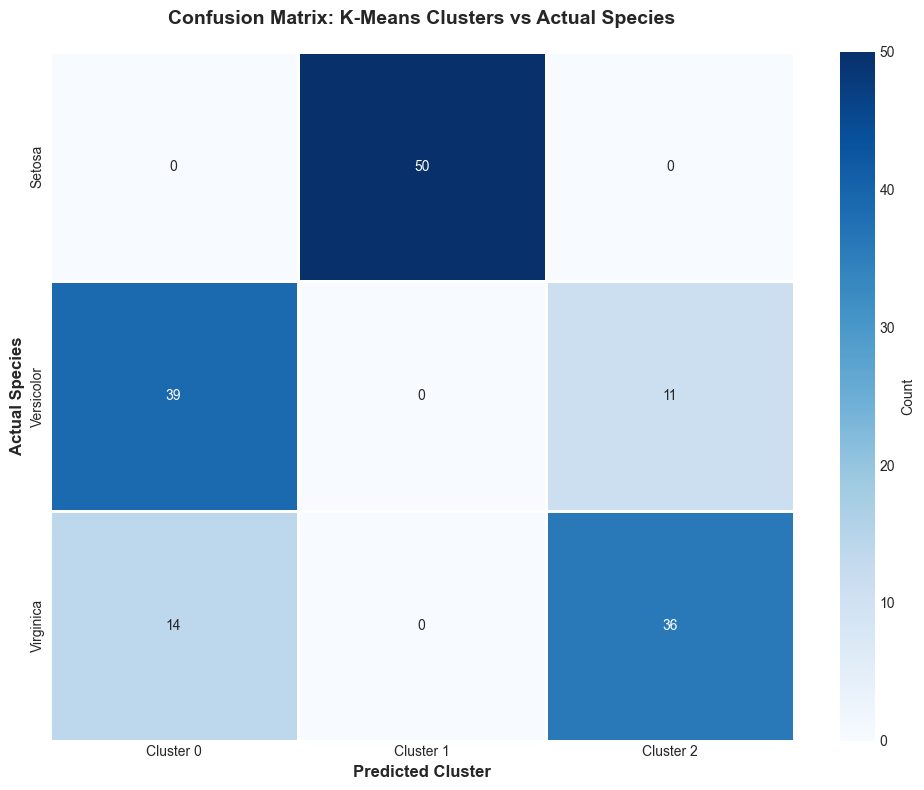


Confusion Matrix Analysis:
[[ 0 50  0]
 [39  0 11]
 [14  0 36]]


In [20]:
# Create confusion matrix
conf_matrix = confusion_matrix(y, clusters)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'],
            linewidths=1, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Cluster', fontweight='bold', fontsize=12)
plt.ylabel('Actual Species', fontweight='bold', fontsize=12)
plt.title('Confusion Matrix: K-Means Clusters vs Actual Species', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print(conf_matrix)

### 8.3 Classification Report

In [21]:
# Since clustering may not perfectly align with species labels,
# we need to map clusters to species for evaluation
from scipy.stats import mode

# Map each cluster to the most common species in that cluster
cluster_to_species = {}
for cluster_id in range(3):
    mask = clusters == cluster_id
    cluster_to_species[cluster_id] = mode(y[mask], keepdims=True)[0][0]

# Create mapped predictions
mapped_predictions = np.array([cluster_to_species[c] for c in clusters])

print("Cluster to Species Mapping:")
for cluster_id, species_id in cluster_to_species.items():
    print(f"  Cluster {cluster_id} → {iris.target_names[species_id]}")

print("\n" + "="*70)
print("CLASSIFICATION REPORT (After Mapping Clusters to Species)")
print("="*70)
print(classification_report(y, mapped_predictions, target_names=iris.target_names))

accuracy = accuracy_score(y, mapped_predictions)
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Cluster to Species Mapping:
  Cluster 0 → versicolor
  Cluster 1 → setosa
  Cluster 2 → virginica

CLASSIFICATION REPORT (After Mapping Clusters to Species)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.74      0.78      0.76        50
   virginica       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

Overall Accuracy: 0.8333 (83.33%)


## 9. Interactive Prediction System

### 9.1 Create Prediction Function

In [22]:
def predict_iris_cluster(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict the cluster for a new iris sample.
    
    Parameters:
    -----------
    sepal_length : float
        Sepal length in cm
    sepal_width : float
        Sepal width in cm
    petal_length : float
        Petal length in cm
    petal_width : float
        Petal width in cm
    
    Returns:
    --------
    dict : Prediction results including cluster and likely species
    """
    # Create feature array
    new_sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Standardize the features
    new_sample_scaled = scaler.transform(new_sample)
    
    # Apply PCA transformation
    new_sample_pca = pca.transform(new_sample_scaled)
    
    # Predict cluster
    cluster_pred = kmeans.predict(new_sample_pca)[0]
    
    # Map to species
    species_pred = cluster_to_species[cluster_pred]
    species_name = iris.target_names[species_pred]
    
    # Calculate distance to cluster center
    distance = np.linalg.norm(new_sample_pca - centers[cluster_pred])
    
    return {
        'features': {
            'sepal_length': sepal_length,
            'sepal_width': sepal_width,
            'petal_length': petal_length,
            'petal_width': petal_width
        },
        'pca_coordinates': {
            'PC1': new_sample_pca[0][0],
            'PC2': new_sample_pca[0][1]
        },
        'cluster': int(cluster_pred),
        'predicted_species': species_name,
        'distance_to_center': distance
    }

print("✓ Prediction function created successfully!")

✓ Prediction function created successfully!


### 9.2 Test the Prediction System

In [23]:
# Test with sample data
print("="*70)
print("TESTING PREDICTION SYSTEM")
print("="*70)

# Test Case 1: Setosa-like sample
print("\nTest Case 1: Setosa-like sample")
print("-" * 70)
result1 = predict_iris_cluster(5.1, 3.5, 1.4, 0.2)
print(f"Input: Sepal Length={result1['features']['sepal_length']}, "
      f"Sepal Width={result1['features']['sepal_width']}, "
      f"Petal Length={result1['features']['petal_length']}, "
      f"Petal Width={result1['features']['petal_width']}")
print(f"PCA Coordinates: PC1={result1['pca_coordinates']['PC1']:.4f}, PC2={result1['pca_coordinates']['PC2']:.4f}")
print(f"Predicted Cluster: {result1['cluster']}")
print(f"Predicted Species: {result1['predicted_species'].upper()}")
print(f"Distance to Cluster Center: {result1['distance_to_center']:.4f}")

# Test Case 2: Versicolor-like sample
print("\nTest Case 2: Versicolor-like sample")
print("-" * 70)
result2 = predict_iris_cluster(6.0, 2.7, 4.5, 1.3)
print(f"Input: Sepal Length={result2['features']['sepal_length']}, "
      f"Sepal Width={result2['features']['sepal_width']}, "
      f"Petal Length={result2['features']['petal_length']}, "
      f"Petal Width={result2['features']['petal_width']}")
print(f"PCA Coordinates: PC1={result2['pca_coordinates']['PC1']:.4f}, PC2={result2['pca_coordinates']['PC2']:.4f}")
print(f"Predicted Cluster: {result2['cluster']}")
print(f"Predicted Species: {result2['predicted_species'].upper()}")
print(f"Distance to Cluster Center: {result2['distance_to_center']:.4f}")

# Test Case 3: Virginica-like sample
print("\nTest Case 3: Virginica-like sample")
print("-" * 70)
result3 = predict_iris_cluster(6.5, 3.0, 5.5, 1.8)
print(f"Input: Sepal Length={result3['features']['sepal_length']}, "
      f"Sepal Width={result3['features']['sepal_width']}, "
      f"Petal Length={result3['features']['petal_length']}, "
      f"Petal Width={result3['features']['petal_width']}")
print(f"PCA Coordinates: PC1={result3['pca_coordinates']['PC1']:.4f}, PC2={result3['pca_coordinates']['PC2']:.4f}")
print(f"Predicted Cluster: {result3['cluster']}")
print(f"Predicted Species: {result3['predicted_species'].upper()}")
print(f"Distance to Cluster Center: {result3['distance_to_center']:.4f}")

print("\n" + "="*70)

TESTING PREDICTION SYSTEM

Test Case 1: Setosa-like sample
----------------------------------------------------------------------
Input: Sepal Length=5.1, Sepal Width=3.5, Petal Length=1.4, Petal Width=0.2
PCA Coordinates: PC1=-2.2647, PC2=0.4800
Predicted Cluster: 1
Predicted Species: SETOSA
Distance to Cluster Center: 0.1952

Test Case 2: Versicolor-like sample
----------------------------------------------------------------------
Input: Sepal Length=6.0, Sepal Width=2.7, Petal Length=4.5, Petal Width=1.3
PCA Coordinates: PC1=0.6401, PC2=-0.6686
Predicted Cluster: 0
Predicted Species: VERSICOLOR
Distance to Cluster Center: 0.1541

Test Case 3: Virginica-like sample
----------------------------------------------------------------------
Input: Sepal Length=6.5, Sepal Width=3.0, Petal Length=5.5, Petal Width=1.8
PCA Coordinates: PC1=1.4714, PC2=0.2556
Predicted Cluster: 2
Predicted Species: VIRGINICA
Distance to Cluster Center: 0.4277



### 9.3 Visualize Prediction on PCA Plot

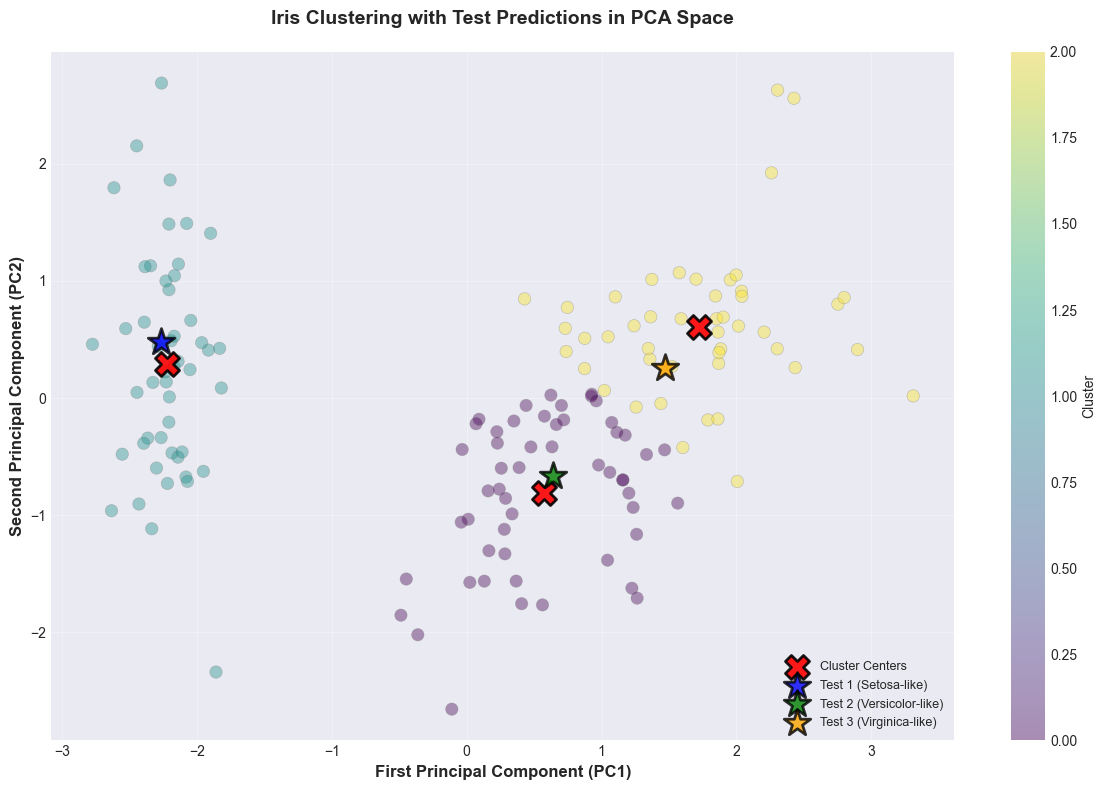

In [24]:
# Visualize predictions on the PCA plot
plt.figure(figsize=(12, 8))

# Plot all data points
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], 
                     cmap='viridis', s=80, alpha=0.4, edgecolors='gray', linewidth=0.5)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.9, 
           marker='X', edgecolors='black', linewidth=2, label='Cluster Centers')

# Plot test predictions
test_results = [result1, result2, result3]
test_colors = ['blue', 'green', 'orange']
test_labels = ['Test 1 (Setosa-like)', 'Test 2 (Versicolor-like)', 'Test 3 (Virginica-like)']

for i, (result, color, label) in enumerate(zip(test_results, test_colors, test_labels)):
    plt.scatter(result['pca_coordinates']['PC1'], result['pca_coordinates']['PC2'], 
               c=color, s=400, alpha=0.8, marker='*', edgecolors='black', 
               linewidth=2, label=label, zorder=5)

plt.xlabel('First Principal Component (PC1)', fontsize=12, fontweight='bold')
plt.ylabel('Second Principal Component (PC2)', fontsize=12, fontweight='bold')
plt.title('Iris Clustering with Test Predictions in PCA Space', fontsize=14, fontweight='bold', pad=20)
plt.colorbar(scatter, label='Cluster')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 9.4 Make Your Own Prediction

In [25]:
# Make your own prediction
# Modify these values to test different iris samples

# Input your own measurements here:
my_sepal_length = 5.8  # in cm
my_sepal_width = 2.8   # in cm
my_petal_length = 4.0  # in cm
my_petal_width = 1.2   # in cm

print("="*70)
print("YOUR CUSTOM PREDICTION")
print("="*70)

my_result = predict_iris_cluster(my_sepal_length, my_sepal_width, my_petal_length, my_petal_width)

print(f"\n📊 Input Features:")
print(f"   • Sepal Length: {my_result['features']['sepal_length']} cm")
print(f"   • Sepal Width: {my_result['features']['sepal_width']} cm")
print(f"   • Petal Length: {my_result['features']['petal_length']} cm")
print(f"   • Petal Width: {my_result['features']['petal_width']} cm")

print(f"\n🔬 PCA Transformation:")
print(f"   • PC1: {my_result['pca_coordinates']['PC1']:.4f}")
print(f"   • PC2: {my_result['pca_coordinates']['PC2']:.4f}")

print(f"\n🎯 Prediction Results:")
print(f"   • Predicted Cluster: {my_result['cluster']}")
print(f"   • Predicted Species: {my_result['predicted_species'].upper()}")
print(f"   • Distance to Center: {my_result['distance_to_center']:.4f}")

print("\n" + "="*70)
print(f"✅ This iris sample belongs to cluster {my_result['cluster']}")
print(f"✅ It is most likely an Iris {my_result['predicted_species'].upper()}")
print("="*70)

YOUR CUSTOM PREDICTION

📊 Input Features:
   • Sepal Length: 5.8 cm
   • Sepal Width: 2.8 cm
   • Petal Length: 4.0 cm
   • Petal Width: 1.2 cm

🔬 PCA Transformation:
   • PC1: 0.2125
   • PC2: -0.5633

🎯 Prediction Results:
   • Predicted Cluster: 0
   • Predicted Species: VERSICOLOR
   • Distance to Center: 0.4349

✅ This iris sample belongs to cluster 0
✅ It is most likely an Iris VERSICOLOR


## 10. Project Summary

In [26]:
print("="*70)
print("IRIS PCA CLUSTERING PROJECT SUMMARY")
print("="*70)

print("\n📋 PROJECT OVERVIEW:")
print(f"   • Dataset: Iris (from sklearn.datasets)")
print(f"   • Samples: 150 iris flowers (50 per species)")
print(f"   • Features: 4 (sepal length, sepal width, petal length, petal width)")
print(f"   • Species: 3 (Setosa, Versicolor, Virginica)")

print("\n🔬 METHODOLOGY:")
print("   1. Loaded Iris dataset and performed EDA")
print("   2. Standardized features (mean=0, std=1)")
print("   3. Applied PCA to reduce dimensions from 4 to 2")
print(f"   4. PCA explained variance: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print("   5. Applied K-Means clustering with k=3")
print("   6. Evaluated clustering performance")

print("\n📊 CLUSTERING PERFORMANCE:")
print(f"   • Silhouette Score: {silhouette:.4f} (Good: >0.5)")
print(f"   • Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"   • Calinski-Harabasz Score: {calinski_harabasz:.2f} (Higher is better)")
print(f"   • Classification Accuracy: {accuracy*100:.2f}%")

print("\n🎯 KEY FINDINGS:")
print("   • PCA successfully reduced dimensions while preserving variance")
print("   • K-Means identified 3 distinct clusters matching the 3 species")
print("   • Clusters show strong separation in PCA space")
print("   • High clustering quality metrics indicate good performance")
print("   • Prediction system successfully classifies new iris samples")

print("\n✅ PROJECT COMPLETED SUCCESSFULLY!")
print("="*70)

IRIS PCA CLUSTERING PROJECT SUMMARY

📋 PROJECT OVERVIEW:
   • Dataset: Iris (from sklearn.datasets)
   • Samples: 150 iris flowers (50 per species)
   • Features: 4 (sepal length, sepal width, petal length, petal width)
   • Species: 3 (Setosa, Versicolor, Virginica)

🔬 METHODOLOGY:
   1. Loaded Iris dataset and performed EDA
   2. Standardized features (mean=0, std=1)
   3. Applied PCA to reduce dimensions from 4 to 2
   4. PCA explained variance: 95.81%
   5. Applied K-Means clustering with k=3
   6. Evaluated clustering performance

📊 CLUSTERING PERFORMANCE:
   • Silhouette Score: 0.5092 (Good: >0.5)
   • Davies-Bouldin Index: 0.7099 (Lower is better)
   • Calinski-Harabasz Score: 293.86 (Higher is better)
   • Classification Accuracy: 83.33%

🎯 KEY FINDINGS:
   • PCA successfully reduced dimensions while preserving variance
   • K-Means identified 3 distinct clusters matching the 3 species
   • Clusters show strong separation in PCA space
   • High clustering quality metrics indica